### Tutorial on Lasso Regression Method
Mini-lecture given on April 23, 2024 for CS315\
Authors: Caroline Jung, Tayae Rogers\
References: [https://machinelearningmastery.com/lasso-regression-with-python/](https://machinelearningmastery.com/lasso-regression-with-python/)

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [149]:
# read in dataset
data = pd.read_csv("tiktok_metadata.csv")
data.columns

Index(['video_id', 'video_timestamp', 'video_duration',
       'video_locationcreated', 'suggested_words', 'video_diggcount',
       'video_sharecount', 'video_commentcount', 'video_playcount',
       'video_description', 'video_is_ad', 'video_stickers', 'author_username',
       'author_name', 'author_followercount', 'author_followingcount',
       'author_heartcount', 'author_videocount', 'author_diggcount',
       'author_verified'],
      dtype='object')

We are interested in the following columns:
* features: video_duration, video_sharecount, video_commentcount, video_is_ad, author_verified
* label: video_playcount

In [172]:
import numpy as np
columns = ["video_playcount", "video_duration", "video_sharecount", "video_commentcount", "video_is_ad", "author_verified"]

data_clean = data.loc[:, columns]
data_clean.replace({False: 0, True: 1}, inplace=True)
#this order of columns seems to matter with the coefficients we get... --> values are slightly diff but which variables get set to 0 are the same
print("Dimensions: ", data_clean.shape)
data_clean.dropna(axis=0, inplace=True)
print("Dimensions after dropping NAs: ", data_clean.shape)

data_clean

Dimensions:  (7663, 6)
Dimensions after dropping NAs:  (7652, 6)


/var/folders/cw/4tmbrj3d1pzd4rhyrm8vnwyc0000gn/T/ipykernel_10621/4080415583.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_clean.replace({False: 0, True: 1}, inplace=True)


,video_playcount,video_duration,video_sharecount,video_commentcount,video_is_ad,author_verified
0,19000000.0,18.0,40100.0,11000.0,0,0
1,6589.0,8.0,1.0,2.0,0,0
2,42400.0,6.0,3.0,8.0,0,0
3,6589.0,8.0,1.0,2.0,0,0
4,42400.0,6.0,3.0,8.0,0,0
...,...,...,...,...,...,...
7658,1800000.0,77.0,18700.0,8859.0,0,0
7659,338900000.0,17.0,3921.0,0.0,1,0
7660,19600.0,13.0,6.0,21.0,0,0
7661,14600000.0,61.0,13700.0,6615.0,0,0


Now we have our cleaned dataset with specific columns of interest and no NA values (for the sake of simplicity and due to large number of rows, we chose to drop the entire row if one of our columns of interest had at least one missing value). Now, let's split them into training and test data sets with a 70-30 split:

In [165]:
# split into train and test data
train, test = train_test_split(data_clean, test_size=0.3)

x_train, y_train = train.iloc[:,1:], train.iloc[:,[1]]
x_test, y_test = test.iloc[:,1:], test.iloc[:,[1]]

In [176]:
lassoreg = Lasso(alpha=1) #hyperparameter of 1 (default value without tuning)
lassoreg.fit(x_train, y_train)

# Note for Tayae: our predictions with alpha=1 is really good. I reran it with alpha=0 (aka no regularization) and then 
# the predictions were off by ~2 views when comparing the predicted and actual values of the y variable in the test dataset 
# which is promising because that means that without regularization, it is actually overfitting!

# regression coefficients
coefs = pd.DataFrame(index=columns[1:], data=lassoreg.coef_)
coefs.loc["intercept"] = lassoreg.intercept_[0]
print(coefs)

                               0
video_duration      9.995931e-01
video_sharecount    2.262831e-08
video_commentcount  4.259128e-08
video_is_ad        -0.000000e+00
author_verified     0.000000e+00
intercept           1.251692e-02


Note that two of our features of interest have coefficients of 0: video_is_ad and author_verified. Our lasso regression has reduced the dimensionality of our model to only 3 features (video_duration, video_sharecount, video_commentcount) and calculated coefficient estimates

In [177]:
import matplotlib.pyplot as plt
y_pred = lassoreg.predict(x_test)

y_test["predicted_val"] = y_pred
y_test["diff"] = y_test["video_duration"]-y_pred
y_test.rename(columns={"video_duration": "actual_val"})

/var/folders/cw/4tmbrj3d1pzd4rhyrm8vnwyc0000gn/T/ipykernel_10621/2859609748.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["predicted_val"] = y_pred
/var/folders/cw/4tmbrj3d1pzd4rhyrm8vnwyc0000gn/T/ipykernel_10621/2859609748.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["diff"] = y_test["video_duration"]-y_pred


,actual_val,predicted_val,diff
7109,15,15.006416,-0.006416
5100,16,16.006123,-0.006123
1366,20,20.004390,-0.004390
3078,30,30.000313,-0.000313
6147,55,54.990182,0.009818
...,...,...,...
651,12,12.007918,-0.007918
4177,44,43.997741,0.002259
1356,8,8.009564,-0.009564
6177,7,7.009737,-0.009737


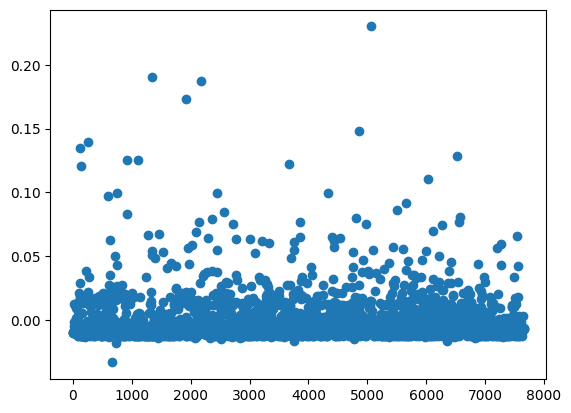

In [178]:
plt.scatter(y_test.index, y_test["diff"]) # Our predictions are pretty good on the training set
plt.show()

#### Tuning the Hyperparameter

In [ ]:
# hyperparameter is the "alpha" in lasso regression
# this site might have an example of this? @tayae: https://machinelearningmastery.com/lasso-regression-with-python/